In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from scipy import stats

In [ ]:
data = pd.read_csv(r"./Churn_Modelling.csv")

# Data wrangling

## General information about the dataset

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


## Check for missing values

In [ ]:
data.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


## remove unnecessary columns and rows with empty values

In [ ]:
data = data.dropna()
data = data.drop(columns=["CustomerId",'RowNumber','Surname'])

In [ ]:
data=data.drop_duplicates()

## Remove outliers

In [ ]:
numerical_cols= ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Exited']

In [ ]:
data = data[(np.abs(stats.zscore(data[numerical_cols])) < 3).all(axis=1)]

In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


## Data stats

In [ ]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9795.000000,9795.000000,9795.000000,9795.000000,9795.000000,9795.000000,9795.000000,9795.000000,9795.000000
mean,650.560694,38.383464,5.012047,76462.847346,1.515467,0.705360,0.509852,100046.134054,0.199898
std,96.311840,9.663708,2.891097,62407.000031,0.550902,0.455904,0.499928,57498.835709,0.399944
min,363.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50992.930000,0.000000
50%,652.000000,37.000000,5.000000,97092.870000,1.000000,1.000000,1.000000,100101.060000,0.000000
75%,718.000000,43.000000,7.000000,127634.770000,2.000000,1.000000,1.000000,149392.065000,0.000000
max,850.000000,70.000000,10.000000,250898.090000,3.000000,1.000000,1.000000,199992.480000,1.000000


# EDA

In [ ]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
label_encoder = LabelEncoder()
for col in ['Geography', 'Gender']:
    data[col] = label_encoder.fit_transform(data[col])

data_corr = data.copy()

In [ ]:
data_corr=data_corr.corr()

<Axes: >

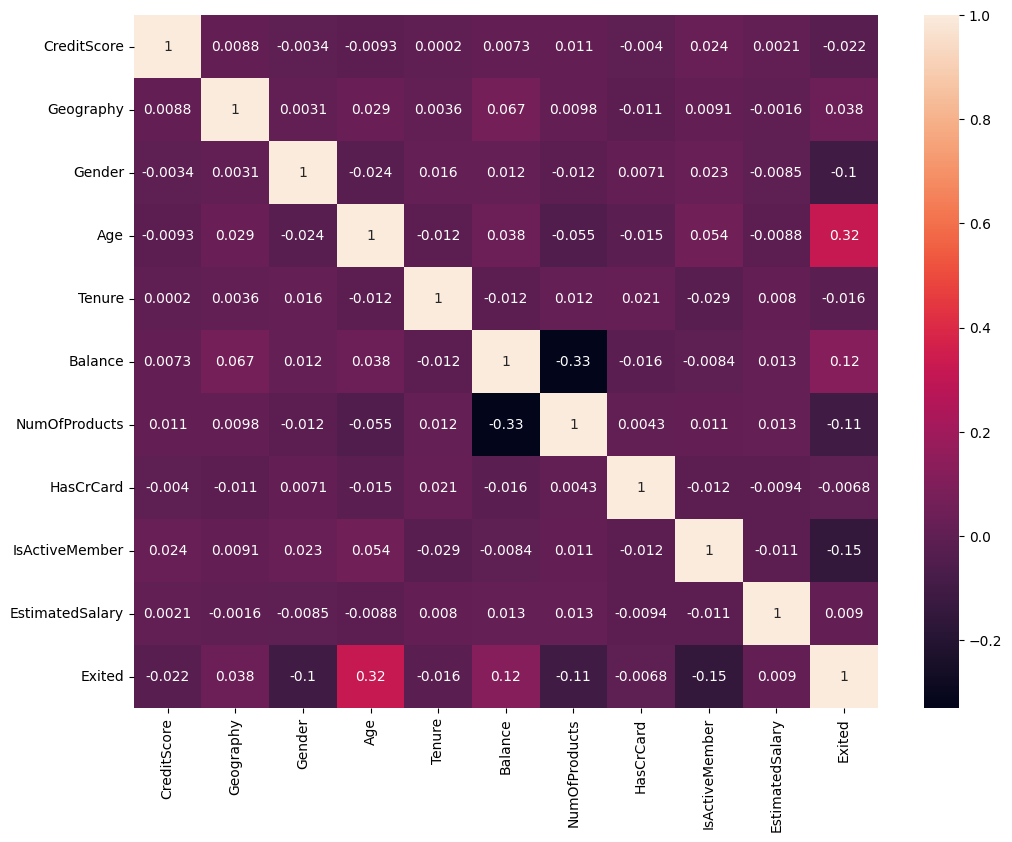

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(data=data_corr,annot=True)

##Average balance of each group by gender

<ipython-input-143-f8c3347b6d22>:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(data=data,x=data.Exited,y=data.Balance,hue="Gender",palette=sns.color_palette(palette='Set2'))


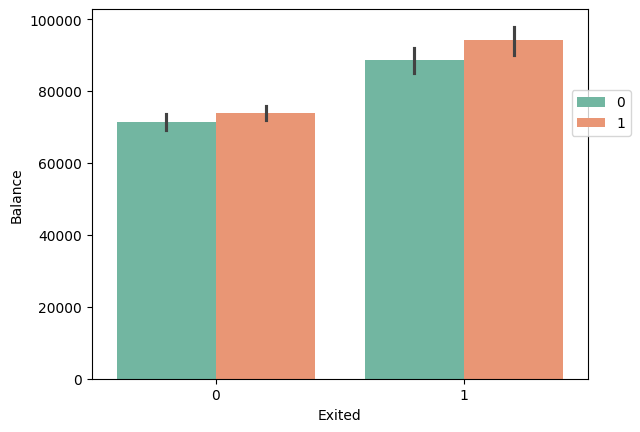

In [ ]:
sns.barplot(data=data,x=data.Exited,y=data.Balance,hue="Gender",palette=sns.color_palette(palette='Set2'))
plt.legend(bbox_to_anchor=(1.1,0.8))

## Relation between Age,Balance and people who churned

<ipython-input-144-2c6cc321ea47>:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(data=data,x=data.Age,y=data.Balance,hue="Exited",palette = sns.color_palette(palette='Dark2'))


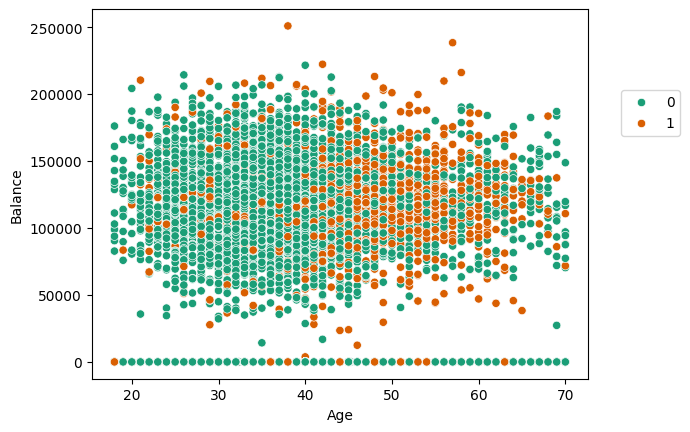

In [ ]:
sns.scatterplot(data=data,x=data.Age,y=data.Balance,hue="Exited",palette = sns.color_palette(palette='Dark2'))
plt.legend(bbox_to_anchor=(1.2,0.8))

## Total number of people of the two groups across locations

<ipython-input-145-ec75ecdad75e>:1: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=data,x=data.Geography,hue=data.Exited,palette=sns.color_palette(palette='Paired'))


<Axes: xlabel='Geography', ylabel='count'>

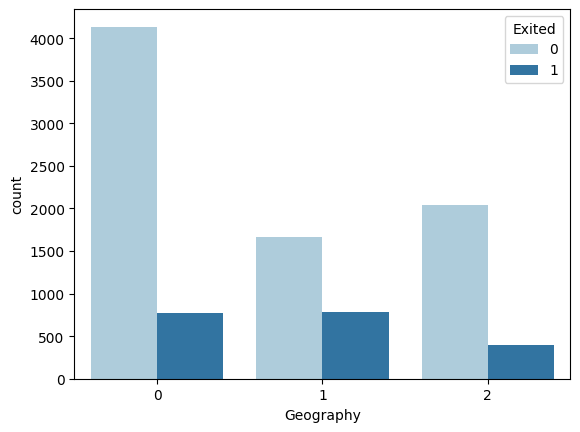

In [ ]:
sns.countplot(data=data,x=data.Geography,hue=data.Exited,palette=sns.color_palette(palette='Paired'))

## Relation between being an active member and churning

<ipython-input-146-842792a7fa78>:1: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=data,x=data.IsActiveMember,hue="Exited",palette=sns.color_palette(palette='Paired'))


<Axes: xlabel='IsActiveMember', ylabel='count'>

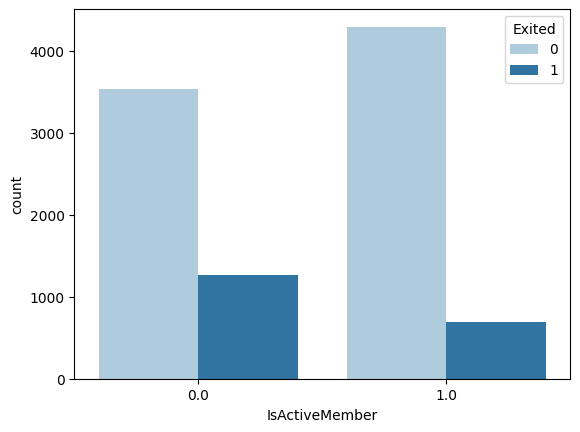

In [ ]:
sns.countplot(data=data,x=data.IsActiveMember,hue="Exited",palette=sns.color_palette(palette='Paired'))

In [ ]:
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data.to_csv('Churn_Modelling_Processed.csv', index=False)